2. Comparison of two multinomial observations: on September 25, 1988, the evening of a presidential campaign debate, ABC News conducted a survey of registered voters in the United States; 639 persons were polled before the debate, and 639 different persons were polled after. The results are displayed in Table 3.2. Assume the surveys are independent simple random samples from the population of registered voters. Model the data with two different multinomial distributions. For j = 1, 2, let αj be the proportion of voters who preferred Bush, out of those who had a preference for either Bush or Dukakis at the time of survey j. Plot a histogram of the posterior density for α2 − α1. What is the posterior probability that there was a shift toward Bush?



    Survey       Bush      Dukakis       No opinion/other      Total
    pre-debate   294       307           38                    639
    post-debate  288       332           19                    639

Modeling the data with two multinomial distributions, using uniform priors on $\theta_j = (\theta_{B, j}, \theta_{D, j}, \theta_{N, j})$, and labeling the pre- and post-debate surveys as $j$ = 1, 2, respectively, our posterior distributions look like:

$P(\theta_j|y_j)$ = $Dirichlet(y_{B, j}+1, y_{D, j}+1, y_{N, j}+1)$, 

so that

$P(\theta_1|y_1)$ = $Dirichlet(295, 308, 39)$

$P(\theta_2|y_2)$ = $Dirichlet(289, 333, 20)$

This means that our posterior distributions for $\alpha_1$ and $\alpha_2$ will be

$P(\alpha_j|y_j)$ = $Beta(y_{B, j}, y_{D, j})$

where $\alpha_j$ = $\theta_{B, j}/(\theta_{B, j} + \theta_{D, j})$.

So,

$P(\alpha_1|y_j)$ = $Beta(295, 308)$

$P(\alpha_2|y_j)$ = $Beta(289, 333)$.

To get an idea of the distribution of $\alpha_2 - \alpha_1$, we can draw 2000 for each of $\alpha_1$ and $\alpha_2$ and plot the distribution of the difference:

In [1]:
from numpy.random import beta

In [2]:
a1 = beta(295, 308, size=2000)

In [3]:
a2 = beta(289, 333, size=2000)

In [4]:
a2_minus_a1 = [a2[i]-a1[i] for i in range(len(a1))]

In [5]:
import matplotlib.pyplot as plt
import numpy as np

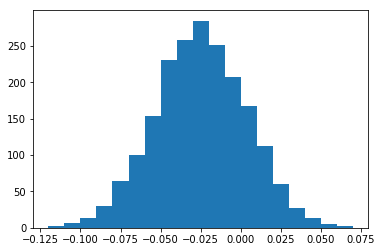

In [6]:
hist = plt.hist(a2_minus_a1, bins=np.arange(-.12, .08, .01))

Based on this histogram, the probability that there was a shift towards Bush due to the debate, i.e., that $\alpha_2 - \alpha_1 > 0$, is:

In [7]:
hist

(array([   2.,    7.,   13.,   30.,   65.,  100.,  154.,  231.,  259.,
         285.,  251.,  208.,  168.,  113.,   60.,   27.,   13.,    5.,    3.]),
 array([ -1.20000000e-01,  -1.10000000e-01,  -1.00000000e-01,
         -9.00000000e-02,  -8.00000000e-02,  -7.00000000e-02,
         -6.00000000e-02,  -5.00000000e-02,  -4.00000000e-02,
         -3.00000000e-02,  -2.00000000e-02,  -1.00000000e-02,
         -5.55111512e-17,   1.00000000e-02,   2.00000000e-02,
          3.00000000e-02,   4.00000000e-02,   5.00000000e-02,
          6.00000000e-02,   7.00000000e-02]),
 <a list of 19 Patch objects>)

In [8]:
tol = 1.E-6
sum([hist[0][i] for i in range(len(hist[0])) if hist[1][i]+tol >= 0.]) /\
sum(h for h in hist[0])

0.1950852557673019

i.e., around 21%.

3. Estimation from two independent experiments: an experiment was performed on the effects of magnetic fields on the flow of calcium out of chicken brains. Two groups of chickens were involved: a control group of 32 chickens and an exposed group of 36 chickens. One measurement was taken on each chicken, and the purpose of the experiment was to measure the average flow μc in untreated (control) chickens and the average flow μt in treated chickens. The 32 measurements on the control group had a sample mean of 1.013 and a sample standard deviation of 0.24. The 36 measurements on the treatment group had a sample mean of 1.173 and a sample standard deviation of 0.20.

(a) Assuming the control measurements were taken at random from a normal distribution with mean μc and variance σc2, what is the posterior distribution of μc? Similarly, use the treatment group measurements to determine the marginal posterior distribution of μt. Assume a uniform prior distribution on (μc, μt, log σc, log σt).

(b) What is the posterior distribution for the difference, μt − μc? To get this, you may sample from the independent t distributions you obtained in part (a) above. Plot a histogram of your samples and give an approximate 95% posterior interval for μt −μc.

The problem of estimating two normal means with unknown ratio of variances is called the Behrens–Fisher problem.

Our prior is uniform:

$P(\mu_{c}, \mu_{t}, log(\sigma_{c}), log(\sigma_{t}))$ = constant.

Based on Section 3.2, the marginal posterior density for $\mu_c$ is

$P(\mu_c|y_c) = t_{n_c-1}(\bar{y_c}, s_c^2/n_c)$

$= t_{31}(1.013, 0.0018)$,

and the marginal posterior density for $\mu_t$ is

$P(\mu_t|y_t) = t_{n_t-1}(\bar{y_t}, s_t^2/n_t)$

$= t_{35}(1.173, 0.0011)$,

The difference $\mu_{t}$ - $\mu_{c}$ can be obtained by sampling from the independent distributions defined above:

In [9]:
from scipy.stats import t

In [10]:
t31 = t(df=31, loc=1.013, scale=.24/32**0.5)

In [11]:
t31_rvs = t31.rvs(size=2000)

In [12]:
print(t31.mean(), t31.var())

1.013 0.00192413793103


In [13]:
t35 = t(df=35, loc=1.173, scale=.2/36**0.5)

In [14]:
print(t35.mean(), t35.var())

1.173 0.00117845117845


In [15]:
diff = t35.rvs(size=2000) - t31.rvs(size=2000)

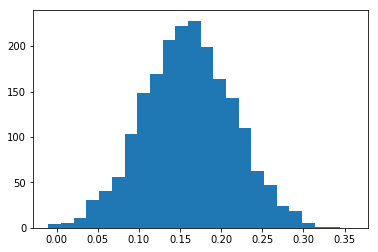

In [16]:
hist = plt.hist(diff, bins=np.linspace(-0.01, 0.36, 25))

In [17]:
hist[0].sum()

1999.0

In [18]:
hist[0].sum() * 0.95

1899.05

In [19]:
hist[0]

array([   4.,    5.,   11.,   31.,   40.,   56.,  103.,  148.,  169.,
        207.,  222.,  228.,  199.,  164.,  143.,  110.,   62.,   47.,
         24.,   19.,    5.,    1.,    1.,    0.])

A 95% confidence interval should have ~2.5% (equivalent to 50 counts for the histogram) left out on either side:

In [20]:
hist[0][:4].sum()

51.0

In [21]:
hist[0][-6:].sum()

50.0

In [22]:
print("Approx. 95% confidence interval:")
print(hist[1][4], hist[1][-6])

Approx. 95% confidence interval:
0.0516666666667 0.282916666667


4. Inference for a 2 × 2 table: an experiment was performed to estimate the effect of beta- blockers on mortality of cardiac patients. A group of patients were randomly assigned to treatment and control groups: out of 674 patients receiving the control, 39 died, and out of 680 receiving the treatment, 22 died. Assume that the outcomes are independent and binomially distributed, with probabilities of death of p0 and p1 under the control and treatment, respectively. We return to this example in Section 5.6.

(a) Set up a noninformative prior distribution on (p0, p1) and obtain posterior simulations.

(b) Summarize the posterior distribution for the odds ratio, (p1/(1 − p1))/(p0/(1 − p0)).

(c) Discuss the sensitivity of your inference to your choice of noninformative prior density.

Our table will look something like this:

    group      y     n    probability
    control    39   674       p0
    treatment  22   680       p1

Our noninformative priors for $p_0$ and $p_1$ will be Beta form with

$\alpha_0 = \beta_0 = \alpha_1 = \beta_1 = 1$.

Our likelihood will be binomial form in each case:

$p(y_0|p_0) \propto p_0^{y_0}(1-p_0)^{n_0-y_0}$,

$p(y_1|p_1) \propto p_1^{y_1}(1-p_1)^{n_1-y_1}$.

Our posterior distribution will then look, in each case, like:

$P(p_0|y_0) \propto p_0^{y_0}(1-p_0)^{n_0-y_0} = Beta(y_0+1, n_0-y_0+1)$,

$P(p_1|y_1) \propto p_1^{y_1}(1-p_1)^{n_1-y_1} = Beta(y_1+1, n_1-y_1+1)$.

Simulating from these distributions,

In [23]:
p0s = beta(40, 675-39, size=2000)
p1s = beta(23, 681-22, size=2000)

(0, 0.1)

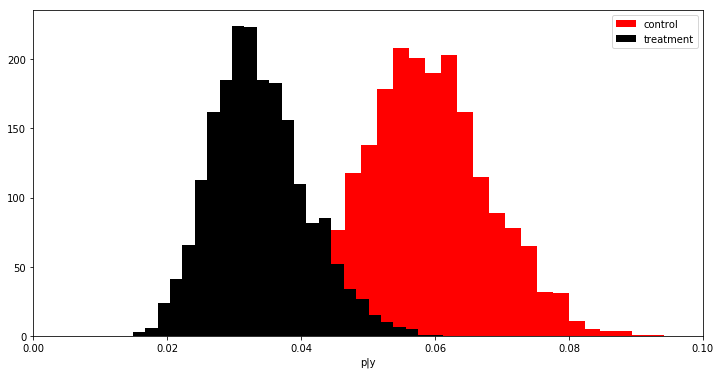

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(p0s, bins=25, color='red', label='control')
ax.hist(p1s, bins=25, color='black', label='treatment')
plt.xlabel('p|y')
plt.legend()
plt.xlim([0, 0.1])

Considering the odds ratio

$\frac{p_1}{(1 − p_1)} / \frac{p_{0}}{(1 − p_{0})}$,

we can simulate this distribution as

In [25]:
odds_ratios  = [(p1s[i]/(1-p1s[i])) / \
                (p0s[i]/(1-p0s[i])) for i in range(len(p0s))]

(array([  11.,   24.,   59.,  114.,  167.,  222.,  224.,  206.,  240.,
         193.,  165.,   96.,   74.,   73.,   36.,   24.,   23.,   14.,
          13.,   13.,    6.,    1.,    0.,    0.,    2.]),
 array([ 0.21441317,  0.25827291,  0.30213264,  0.34599238,  0.38985211,
         0.43371185,  0.47757158,  0.52143132,  0.56529105,  0.60915079,
         0.65301052,  0.69687026,  0.74072999,  0.78458972,  0.82844946,
         0.87230919,  0.91616893,  0.96002866,  1.0038884 ,  1.04774813,
         1.09160787,  1.1354676 ,  1.17932734,  1.22318707,  1.26704681,
         1.31090654]),
 <a list of 25 Patch objects>)

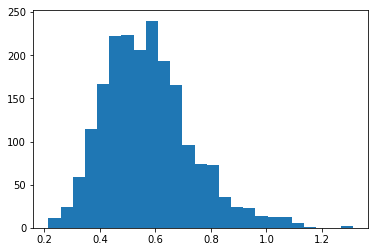

In [26]:
plt.hist(odds_ratios, bins=25)

5. Rounded data: it is a common problem for measurements to be observed in rounded form (for a review, see Heitjan, 1989). For a simple example, suppose we weigh an object five times and measure weights, rounded to the nearest pound, of 10, 10, 12, 11, 9. Assume the unrounded measurements are normally distributed with a noninformative prior distribution on the mean μ and variance σ2.

(a) Give the posterior distribution for (μ, σ2) obtained by pretending that the observations are exact unrounded measurements.

(b) Give the correct posterior distribution for (μ,σ2) treating the measurements as rounded.

(c) How do the incorrect and correct posterior distributions differ? Compare means, variances, and contour plots.

(d) Let z=(z1,...,z5) be the original, unrounded measurements corresponding to the five observations above. Draw simulations from the posterior distribution of z. Compute the posterior mean of (z1 − z2)^2.

(a) Here we use a flat prior for ($\mu$, $\sigma^2$).

In [27]:
ys = [10, 10, 12, 11, 9]

In [28]:
Sample_mean = sum(ys) / 5.

In [29]:
Sample_mean

10.4

In [30]:
Sample_std = sum([(i - Sample_mean)**2. for i in ys])**0.5

In [31]:
Sample_std

2.280350850198276

In [228]:
from scipy.stats import norm

In [485]:
def log_postr_unrounded(ys, mu, sigma):
    out = 0
    for y in ys:
        out += np.log(norm.pdf(y, loc=mu, scale=sigma))
    return out

In [253]:
x = np.linspace(3, 18, 200)
y = np.linspace(-2., 4., 200)

xx, yy = np.meshgrid(x, y)

In [254]:
logdens_a = log_postr_unrounded(ys, xx, np.exp(yy))

/Users/cb/miniconda3/envs/bda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [255]:
dens_a = np.exp(logdens_a - logdens_a.max())

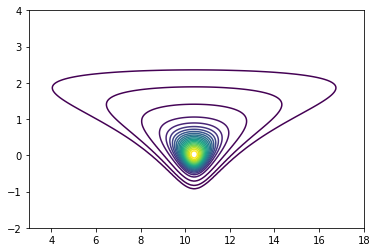

In [256]:
plt.contour(x, y, dens_a, levels=contours)

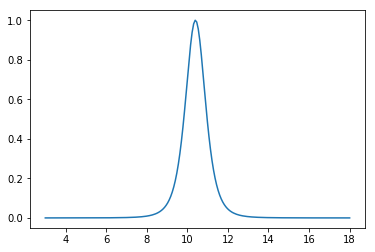

In [353]:
plt.plot(x, dens_a.sum(axis=0)/dens_a.sum(axis=0).max())

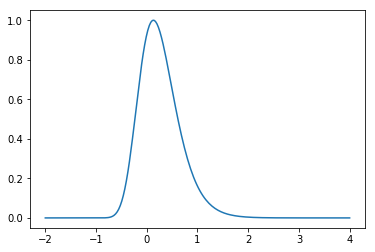

In [354]:
plt.plot(y, dens_a.sum(axis=1)/dens_a.sum(axis=1).max())

In [345]:
# sample from the marginal distributions to check that they 
# match the shape of the above
nsim = 10000
sig2s = (n-1)*s2/np.random.chisquare(n-1, nsim)
mus = [np.random.normal(loc=ybar, scale=np.sqrt(sig2/n)) for sig2 in sig2s]

In [346]:
sigs = np.sqrt(sig2s)

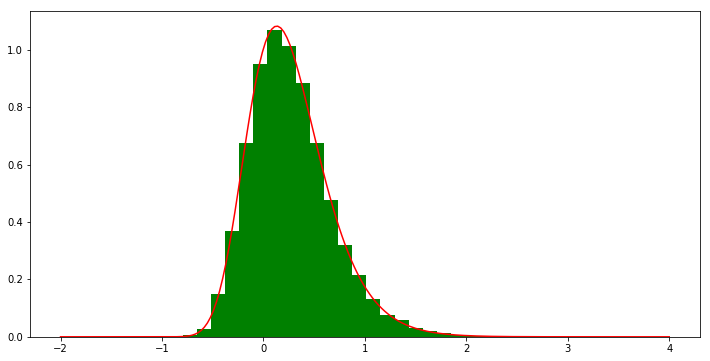

In [466]:
fig, ax = plt.subplots(figsize=(12, 6))

sighist = ax.hist(np.log(sigs), bins=25, density=True, color='green')
plt.plot(y, dens_a.sum(axis=1)/(dens_a.sum(axis=1).sum())/(y[1]-y[0]), color='red')

(3, 18)

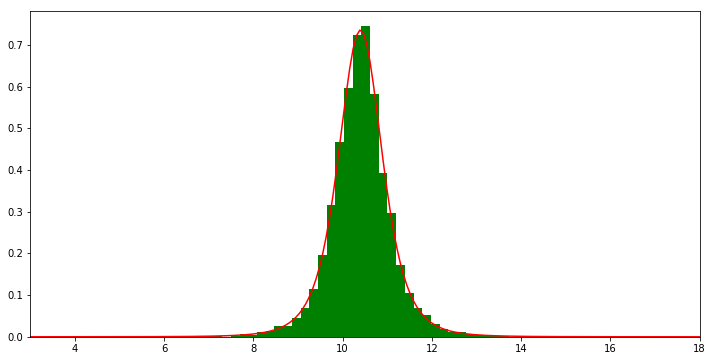

In [464]:
fig, ax = plt.subplots(figsize=(12, 6))

muhist = ax.hist(mus, bins=75, density=True, color='green')
plt.plot(x, dens_a.sum(axis=0)/(dens_a.sum(axis=0).sum())/(x[1]-x[0]), color='red')

plt.xlim([3, 18])

In [373]:
def calculate_mean(vals, density):
    mean = 0
    for ii, val in enumerate(vals[:-1]):
        mean = mean + 0.5*(val+vals[ii+1])*density[ii]
    return mean*(vals[1]-vals[0])

In [399]:
def calculate_std(vals, density):
    mean = calculate_mean(vals, density)
    var = 0.
    for ii, val in enumerate(vals[:-1]):
        var = var + (0.5*(val+vals[ii+1]))**2*density[ii]
    var = var*(vals[1]-vals[0])
    var = var - mean**2
    return np.sqrt(var) 

In [470]:
def calculate_percentiles(vals, pcls):
    def calculate_percentile(vals, pcl):
        return sorted(vals)[int(len(vals)*pcl)]
    c = []
    for pcl in pcls:
        out = calculate_percentile(vals, pcl)
        c.append({pcl: out})
    return c

In [501]:
print("Parameter mu, ignoring rounding:")
print("\tmean\t:\t{0}".format(round(calculate_mean(muhist[1], muhist[0]), 3)))
print("\tstd\t:\t{0}".format(round(calculate_std(muhist[1], muhist[0]), 3)))
print("percentiles:")
for el in calculate_percentiles(mus, [0.025, 0.25, 0.50, 0.75, 0.975]):
    print("\t{0}\t:\t{1}".format(list(el.keys())[0]*100,
                               round(list(el.values())[0], 3)))

Parameter mu, ignoring rounding:
	mean	:	10.404
	std	:	0.724
percentiles:
	2.5	:	8.973
	25.0	:	10.026
	50.0	:	10.406
	75.0	:	10.775
	97.5	:	11.85


In [515]:
# histogram for sigma w/o log function
sighist_ = ax.hist(sigs, bins=25, density=True, color='green')

In [518]:
print("Parameter sigma, ignoring rounding:")
print("\tmean\t:\t{0}".format(round(calculate_mean(sighist_[1],
                                            sighist_[0]), 3)))
print("\tstd\t:\t{0}".format(round(calculate_std(sighist_[1], 
                                                 sighist_[0]), 3)))
print("percentiles:")
for el in calculate_percentiles(sigs, [0.025, 0.25, 0.50, 0.75, 0.975]):
    print("\t{0}\t:\t{1}".format(list(el.keys())[0]*100,
                               round(list(el.values())[0], 3)))

Parameter sigma, ignoring rounding:
	mean	:	1.431
	std	:	0.771
percentiles:
	2.5	:	0.683
	25.0	:	0.985
	50.0	:	1.246
	75.0	:	1.649
	97.5	:	3.365


(b) Now we repeat for the case where rounding is taken into account.  In this case the density associated with each of the $y$ values will equal the difference between the CDF of the maximum possible value for $y$ and the CDF of the minimum possible value of $y$.

In [486]:
def log_postr_rounded(ys, mu, sigma):
    out = 0
    for y in ys:
        out += np.log(norm.cdf(y+0.5, loc=mu, scale=sigma) - 
                      norm.cdf(y-0.5, loc=mu, scale=sigma))
    return out

In [487]:
logdens_b = log_postr_rounded(ys, xx, np.exp(yy))

/Users/cb/miniconda3/envs/bda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [488]:
dens_b = np.exp(logdens_b - logdens_b.max())

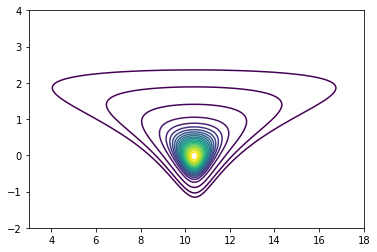

In [489]:
plt.contour(x, y, dens_b, levels=contours)

In this case we do not have the analytical marginal distributions for $\mu$ and $\sigma$, but we can use the distributions implied by the grid:

In [490]:
dens_logsig_b = dens_b.sum(axis=1)/(dens_b.sum(axis=1).sum())/(y[1]-y[0])

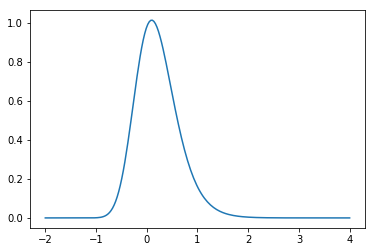

In [491]:
plt.plot(y, dens_logsig_b)

Sampling sigmas from this distrubution:

In [500]:
sigs_b = np.exp(np.random.choice(y, replace=True, size=nsim,
                        p=dens_logsig_b/dens_logsig_b.sum()))

In [521]:
dens_mu_b = dens_b.sum(axis=0)/(dens_b.sum(axis=0).sum())/(x[1]-x[0])

In [522]:
mus_b = np.random.choice(x, replace=True, size=nsim,
                        p=dens_mu_b/dens_mu_b.sum())

In [524]:
muhist_b = ax.hist(mus_b, bins=75, density=True, color='green')

In [525]:
print("Parameter mu, including rounding:")
print("\tmean\t:\t{0}".format(round(calculate_mean(muhist_b[1], 
                                                   muhist_b[0]), 3)))
print("\tstd\t:\t{0}".format(round(calculate_std(muhist_b[1], 
                                                 muhist_b[0]), 3)))
print("percentiles:")
for el in calculate_percentiles(mus_b, [0.025, 0.25, 0.50, 0.75, 0.975]):
    print("\t{0}\t:\t{1}".format(list(el.keys())[0]*100,
                               round(list(el.values())[0], 3)))

Parameter mu, including rounding:
	mean	:	10.412
	std	:	0.706
percentiles:
	2.5	:	9.03
	25.0	:	10.01
	50.0	:	10.387
	75.0	:	10.764
	97.5	:	11.744


In [526]:
sighist_b_ = ax.hist(sigs_b, bins=25, density=True, color='green')

In [527]:
print("Parameter sigma, ignoring rounding:")
print("\tmean\t:\t{0}".format(round(calculate_mean(sighist_b_[1],
                                            sighist_b_[0]), 3)))
print("\tstd\t:\t{0}".format(round(calculate_std(sighist_b_[1], 
                                                 sighist_b_[0]), 3)))
print("percentiles:")
for el in calculate_percentiles(sigs_b, [0.025, 0.25, 0.50, 0.75, 0.975]):
    print("\t{0}\t:\t{1}".format(list(el.keys())[0]*100,
                               round(list(el.values())[0], 3)))

Parameter sigma, ignoring rounding:
	mean	:	1.338
	std	:	0.789
percentiles:
	2.5	:	0.611
	25.0	:	0.932
	50.0	:	1.186
	75.0	:	1.604
	97.5	:	3.209


(c)
The results are similar whether rounding is included or not.  The main difference is the shift to lower values for $\sigma$ in the lower quantiles.  This is most easily seen by plotting the contours for both models on the same plot:

Text(0,0.5,'log(sigma)')

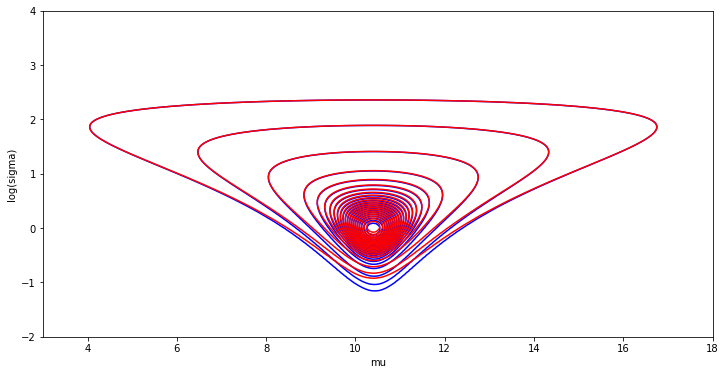

In [532]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.contour(x, y, dens_b, levels=contours, colors='blue')
ax.contour(x, y, dens_a, levels=contours, colors='red') 

plt.xlabel('mu')
plt.ylabel('log(sigma)')

(d)
We can use the sampled values of $\sigma$ and $\mu$ above to generate normal densities, which we can truncate appropriately in order to sample our $z$ values.

In [603]:
z = [[], [], [], [], []]
for jj, y in enumerate(ys):
    lower = norm.cdf(y-0.5, mus_b, sigs_b)
    upper = norm.cdf(y+0.5, mus_b, sigs_b)
    z[jj] = norm.ppf(lower + np.random.uniform(size=nsim)*(upper-lower), 
                              loc=mus_b, scale=sigs_b)

In [610]:
# posterior mean of (z1 − z2)^2:
np.square(z[1]-z[0]).mean()

0.15458393720334282

9. Conjugate normal model: suppose y is an independent and identically distributed sample of size n from the distribution N(μ,σ2), where the prior distribution for (μ,σ2) is N-Inv-χ2(μ, σ2|μ0, σ02/κ0; ν0, σ02); that is, σ2 ∼ Inv-χ2(ν0, σ02) and μ|σ2 ∼ N(μ0, σ2/κ0). The posterior distribution, p(μ,σ2|y), is also normal-inverse-χ2; derive explicitly its pa- rameters in terms of the prior parameters and the sufficient statistics of the data.

Per Section 3.3, we have, respectively, a density for the variance $\sigma^2$ and a density for the mean $\mu$ conditioned on the variance, as:

$P(\sigma^2)$ = Inv$-\chi^2(\nu_0, \sigma_0^2)$
$\propto (\sigma^2{)}^{-(1+\nu_0/2)}\exp(-\frac{1}{2\sigma^2}[\nu_0 \sigma_0^2])$,

$P(\mu|\sigma^2) = \mathcal{N}(\mu_0, \sigma^2/\kappa_0)$
$\propto \sigma^{-1}\exp(-\frac{\kappa_0}{2\sigma^2}[\mu-\mu_0]^2)$

which implies a joint prior density

$P(\mu, \sigma^2)$ = $P(\mu|\sigma^2)$$P(\sigma^2)$
$\propto \sigma^{-1}(\sigma^2{)}^{-(1+\nu_0/2)}\exp(-\frac{1}{2\sigma^2}[\nu_0 \sigma_0^2 + \kappa_0(\mu-\mu_0)^2])$.

This density is denoted $\mathcal{N}$-Inv-$\chi^2(\mu,\sigma^2|\mu_0,\sigma_0^2/\kappa_0;\nu_0,\sigma_0^2)$, and the parameters can be understood respectively as the location and scale of the mean $\mu$, and the degrees of freedom and scale of the variance $\sigma^2$.

A normal likelihood

$P(y|\mu, \sigma^2)$ 

$\propto (\sigma^2)^{-\frac{n}{2}}\exp(-\frac{1}{2\sigma^2}\Sigma_{i=1}^n(y_i - \mu)^2)$

$=(\sigma^2)^{-\frac{n}{2}}\exp(-\frac{1}{2\sigma^2}[(n-1)s^2+n(\bar{y}-\mu)^2])$,

$= (\sigma^2)^{-\frac{n}{2}}\exp(-\frac{1}{2\sigma^2}\Sigma_{i=1}^n(y_i - \mu)^2)$

$=(\sigma^2)^{-\frac{n}{2}}\exp(-\frac{1}{2\sigma^2}[(n-1)s^2+n(\bar{y}-\mu)^2])$,

where $\bar{y}$ is the sample mean and $s^2$ the sample variance,

leads to the posterior density

$P(\mu, \sigma^2|y)$

$\propto \sigma^{-1}(\sigma^2{)}^{-(1+(\nu_0+n)/2)}\exp\left(-\frac{1}{2\sigma^2}[\nu_o\sigma_0^2+(n-1)s^2+n(\bar{y}-\mu)+\kappa_0(\mu-\mu_0)^2]\right)$

$=\sigma^{-1}(\sigma^2{)}^{-(1+(\nu_0+n)/2)}\exp\left(-\frac{1}{2\sigma^2}[\nu_o\sigma_0^2+(n-1)s^2+(n\mu^2-2n\mu\bar{y}+n\bar{y}^2+\kappa_0\mu^2-2\kappa_0\mu_0\mu+\kappa_0\mu_0^2)]\right)$

$=\sigma^{-1}(\sigma^2{)}^{-(1+(\nu_0+n)/2)}\exp\left(-\frac{1}{2\sigma^2}\left[\nu_o\sigma_0^2+(n-1)s^2+(n+\kappa_0)\mu^2 + \frac{(n+\kappa_0)n\bar{y}^2 + (n+\kappa_0)\kappa_0\mu_0^2 - (n+\kappa_0)2n\mu\bar{y} - (n+\kappa_0)2\kappa_0\mu\mu_0}{n+\kappa_0}\right]\right)$

$=\sigma^{-1}(\sigma^2{)}^{-(1+(\nu_0+n)/2)}\exp\left(-\frac{1}{2\sigma^2}\left[\nu_o\sigma_0^2+(n-1)s^2+
(n+\kappa_0)\left(\mu^2 + \frac{n\bar{y}^2+\kappa_0\mu_0^2}{n+\kappa_0} + \frac{-2n\mu\bar{y}-2\kappa_0\mu\mu_0}{n+\kappa_0}\right)\right]\right)$

$=\sigma^{-1}(\sigma^2{)}^{-(1+(\nu_0+n)/2)}\exp\left(-\frac{1}{2\sigma^2}\left[\nu_o\sigma_0^2+(n-1)s^2+
(n+\kappa_0)\left(\mu^2 + \frac{(n+\kappa_0)(n\bar{y}^2+\kappa_0\mu_0^2)}{(n+\kappa_0)^2} + \frac{-2n\mu\bar{y}-2\kappa_0\mu\mu_0}{n+\kappa_0}\right)\right]\right)$

$=\sigma^{-1}(\sigma^2{)}^{-(1+(\nu_0+n)/2)}\exp\left(-\frac{1}{2\sigma^2}\left[\nu_o\sigma_0^2+(n-1)s^2+
(n+\kappa_0)\left(\mu^2 + \frac{n^2\bar{y}^2+n\kappa_0\bar{y}^2+n\kappa_0\mu_0^2+\kappa_0^2\mu_0^2}{(n+\kappa_0)^2} + \frac{-2n\mu\bar{y}-2\kappa_0\mu\mu_0}{n+\kappa_0}\right)\right]\right)$

$=\sigma^{-1}(\sigma^2{)}^{-(1+(\nu_0+n)/2)}\exp\left(-\frac{1}{2\sigma^2}\left[\nu_o\sigma_0^2+(n-1)s^2+
(n+\kappa_0)\left(\mu^2 + \frac{n^2\bar{y}^2+\kappa_0^2\mu_0^2}{(n+\kappa_0)^2} + \frac{n\kappa_0\bar{y}^2+n\kappa_0\mu_0^2}{(n+\kappa_0)^2} + \frac{-2n\mu\bar{y}-2\kappa_0\mu\mu_0}{n+\kappa_0}\right)\right]\right)$

$=\sigma^{-1}(\sigma^2{)}^{-(1+(\nu_0+n)/2)}\exp\left(-\frac{1}{2\sigma^2}\left[\nu_o\sigma_0^2+(n-1)s^2+
(n+\kappa_0)\left(\mu^2 + \frac{n^2\bar{y}^2+\kappa_0^2\mu_0^2 + 2n\bar{y}\mu_0\kappa_0}{(n+\kappa_0)^2} + \frac{n\kappa_0\bar{y}^2+n\kappa_0\mu_0^2 - 2n\bar{y}\mu_0\kappa_0}{(n+\kappa_0)^2} + \frac{-2n\mu\bar{y}-2\kappa_0\mu\mu_0}{n+\kappa_0}\right)\right]\right)$

$=\sigma^{-1}(\sigma^2{)}^{-(1+(\nu_0+n)/2)}\times$
$\exp\left(-\frac{1}{2\sigma^2}\left[\nu_o\sigma_0^2+(n-1)s^2+
(n+\kappa_0)
\left(\mu^2 + \left(\frac{n\bar{y}+\kappa_0\mu_0}{n+\kappa_0}\right)^2
-2\mu\left(\frac{n\bar{y}+\kappa_0\mu_0}{n+\kappa_0}\right)
+ \frac{n\kappa_0\bar{y}^2+n\kappa_0\mu_0^2 - 2n\bar{y}\mu_0\kappa_0}{(n+\kappa_0)^2}
+2\mu\left(\frac{n\bar{y}+\kappa_0\mu_0}{n+\kappa_0}\right)
+\frac{-2n\mu\bar{y}-2\kappa_0\mu\mu_0}{n+\kappa_0}\right)\right]
\right)$

$=\sigma^{-1}(\sigma^2{)}^{-(1+(\nu_0+n)/2)}\exp\left(-\frac{1}{2\sigma^2}\left[\nu_o\sigma_0^2+(n-1)s^2+
(n+\kappa_0)
\left(\left[\mu - \frac{n\bar{y}+\kappa_0\mu_0}{n+\kappa_0}\right]^2
+\frac{n\kappa_0(\bar{y}-\mu_0)^2/(n+\kappa_0)}{n+\kappa_0}\right)\right]
\right)$

<!--
$=\sigma^{-1}(\sigma^2{)}^{-(1+(\nu_0+n)/2)}\exp\left(-\frac{1}{2\sigma^2}\left[\nu_0\sigma_0^2 + (n-1)s^2 + \frac{\kappa_0n}{\kappa_0+n}(\bar{y}-\mu_0)^2 + (\kappa_0+n)\{\mu-(\frac{\kappa_0}{\kappa_0+n}\mu_0+\frac{\kappa_0}{\kappa_0+n}\bar{y})\}^2\right]\right)$,
-->

$=\sigma^{-1}(\sigma^2{)}^{-(1+\nu_n/2)}\exp\left(-\frac{1}{2\sigma^2}[\nu_n\sigma_n^2 + \kappa_n(\mu-\mu_n)^2]\right)$,

with

$\mu_n = \frac{\kappa_0}{\kappa_0+n}\mu_0+\frac{\kappa_0}{\kappa_0+n}\bar{y}$,

$\kappa_n = \kappa_0 + n$,

$\nu_n = \nu_0 + n$,

$\nu_n\sigma_n^2 =  \nu_0\sigma_0^2 + (n-1)s^2 + \frac{\kappa_0n}{\kappa_0+n}(\bar{y}-\mu_0)^2$,

which is 
Inv-$\chi^2(\mu,\sigma^2|\mu_n,\sigma_n^2/\kappa_n;\nu_n,\sigma_n^2)$.